Número de nós: 1000
Número de arestas: 962
Densidade: 0.001925925925925926


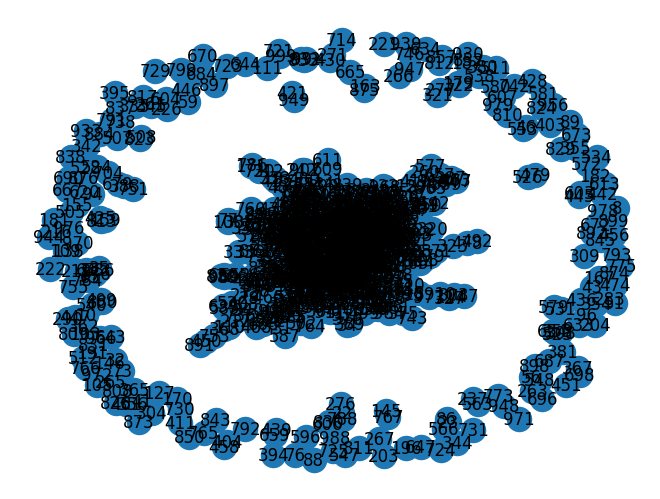

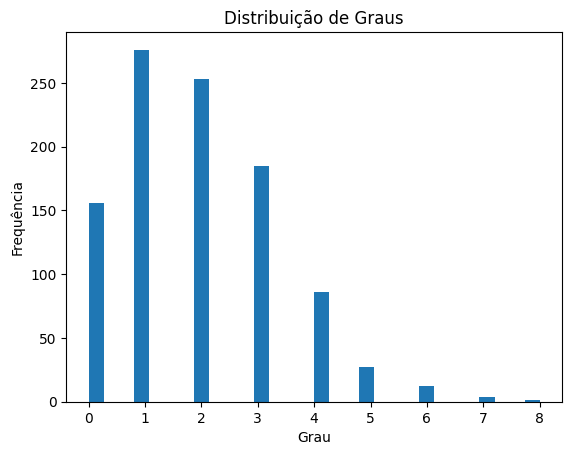

Grau mais elevado: 8
Moda da distribuição: 1
A rede está ligada: False
Número de nós no componente gigante: 776
Coeficiente de agrupamento médio: 0.0005
A rede não é conexa, o diâmetro não pode ser calculado.


In [23]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
def create_random_graph(num_nodes, p):
  G = nx.erdos_renyi_graph(n=num_nodes, p=p)
  return G

# Criando o grafo com 1000 nós e probabilidade 0.002
G = create_random_graph(1000, 0.002)

# Visualizando algumas informações sobre o grafo (opcional)
print("Número de nós:", G.number_of_nodes())
print("Número de arestas:", G.number_of_edges())
print("Densidade:", nx.density(G))

nx.draw(G, with_labels=True)
plt.show()

degrees = [degree for node, degree in G.degree()]
plt.hist(degrees, bins=30)
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Distribuição de Graus')
plt.show()

# Respondendo às perguntas:
# a. Grau mais elevado
max_degree = max(degrees)
print("Grau mais elevado:", max_degree)

# b. Moda da distribuição
mode = np.argmax(np.bincount(degrees))
print("Moda da distribuição:", mode)

# c. A rede está ligada?
print("A rede está ligada:", nx.is_connected(G))
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    print("Número de nós no componente gigante:", len(largest_cc))

# d. Coeficiente de agrupamento médio
avg_clustering = nx.average_clustering(G)
print("Coeficiente de agrupamento médio:", avg_clustering)

# e. Diâmetro da rede
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Diâmetro da rede:", diameter)
else:
    print("A rede não é conexa, o diâmetro não pode ser calculado.")

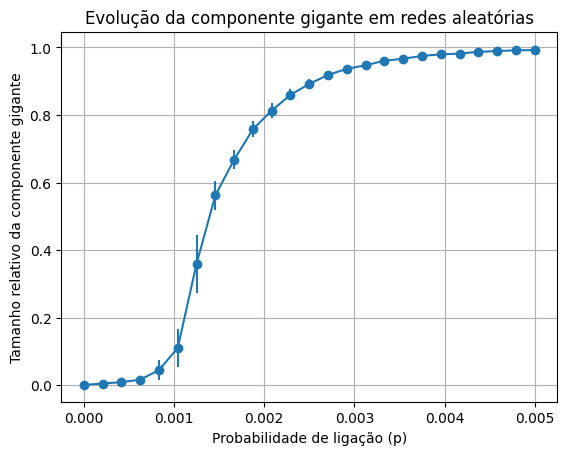

In [24]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_giant_component(n, p_values, num_trials):
    """
    Simula o crescimento da componente gigante em redes aleatórias.

    Args:
        n: Número de nós na rede.
        p_values: Lista de probabilidades de ligação a serem testadas.
        num_trials: Número de simulações para cada valor de p.
    
    Returns:
        Duas listas: médias e desvios padrão do tamanho relativo da componente gigante.
    """

    giant_component_sizes = []
    for p in p_values:
        sizes = []
        for _ in range(num_trials):
            G = nx.erdos_renyi_graph(n, p)
            gcc_size = max(nx.connected_components(G), key=len)
            sizes.append(len(gcc_size) / n)
        giant_component_sizes.append((np.mean(sizes), np.std(sizes)))
    
    return zip(*giant_component_sizes)

# Parâmetros
n = 1000
p_min, p_max = 0, 0.005
num_p_values = 25
num_trials = 30

# Gerando os valores de probabilidade
p_values = np.linspace(p_min, p_max, num_p_values)

# Simulando e calculando as estatísticas
means, stds = simulate_giant_component(n, p_values, num_trials)

# Plotando o gráfico
plt.errorbar(p_values, means, yerr=stds, marker='o', label='Tamanho relativo da componente gigante')
plt.xlabel('Probabilidade de ligação (p)')
plt.ylabel('Tamanho relativo da componente gigante')
plt.title('Evolução da componente gigante em redes aleatórias')
plt.grid(True)
plt.show()
